# **Lab Assignment 5: Tips on Multivariate**
Refer to tips datasource of seaborn sample dataset.

Answer the following questions by providing the answer with seaborn visualization:

1. What’s the distribution of bills throughout the week? Reveal which day tends to have higher spending.
2. How does tip amount vary by gender? Compare how tipping behavior may differ between male and female customers.
3. Do smokers tip differently than non-smokers across time?  Reveal patterns in tipping depending on smoking status and meal time.
4. What’s the tipping behavior by party size and gender? Show if tipping scales with group size and whether gender plays a role in larger parties.
5. Is there a relationship between total bill and tip, broken down by day? Highlight day when generous tippers come in and how bills/tips pair.
6. How does tipping vary between Lunch and Dinner, split by gender? Reveal how tip amounts are concentrated by time and gender.Use violin plot.
7. Which day sees the most customers?
8. What variables are most correlated with tip amount? What does it says, generally?
9. Is party size associated with higher bills or tips?
10. Do total bill and tip always increase together?
11. How do tip and total_bill relate across days? Spot whether certain days (e.g. Saturday) have bigger bills and tips.
12. Are bigger groups more generous tippers?  Use hue to reveal gender-based patterns among party size and tipping.
13. Do males and females show different spending or tipping habits? Highlight behavior differences by color-coded trends.

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load tips dataset of seaborn
data = sns.load_dataset('tips')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# Describe the numerical data
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
# Check for null values
data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


## **Task 1**: What’s the distribution of bills throughout the week? Reveal which day tends to have higher spending.
---
Some days have consistently higher bills, like Saturday and Sunday, which show elevated spending patterns.

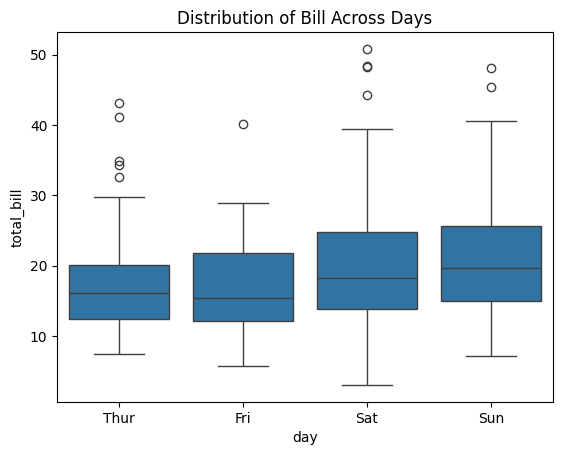

In [ ]:
# Distribution of bill across days
sns.boxplot(x='day', y='total_bill', data=data)
plt.title('Distribution of Bill Across Days')
plt.show()

## **Task 2**: How does tip amount vary by gender? Compare how tipping behavior may differ between male and female customers.
---
Males may tip slightly more on average, but variation exists within both genders.

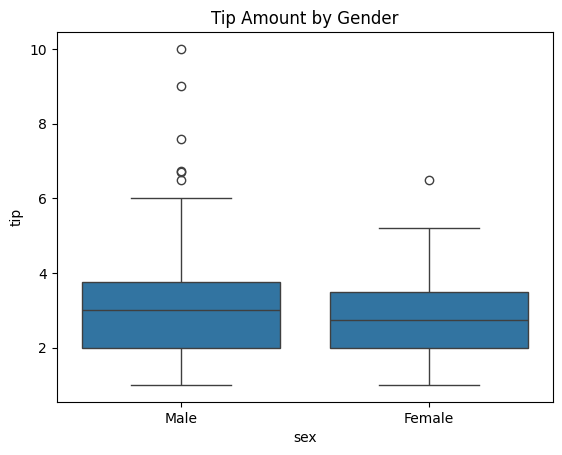

In [ ]:
# Tip amount by gender
sns.boxplot(x='sex', y='tip', data=data)
plt.title('Tip Amount by Gender')
plt.show()

## **Task 3**: Do smokers tip differently than non-smokers across time? Reveal patterns in tipping depending on smoking status and meal time.
---
Smoking status appears to influence tipping behavior, especially during dinner time.

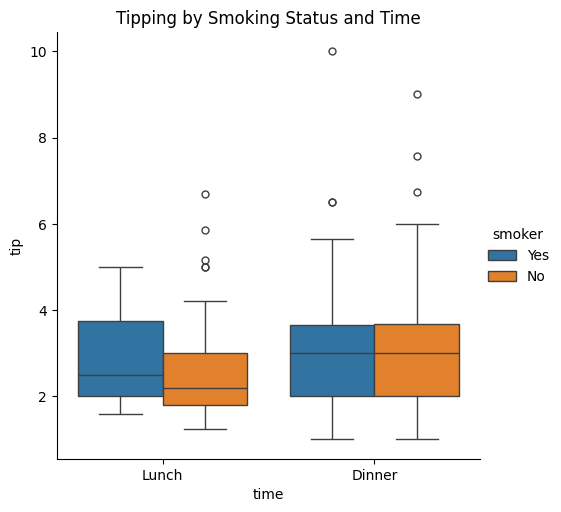

In [ ]:
# Tipping by smoking status and time
sns.catplot(x='time', y='tip', hue='smoker', kind='box', data=data)
plt.title('Tipping by Smoking Status and Time')
plt.show()

## **Task 4**: What’s the tipping behavior by party size and gender? Show if tipping scales with group size and whether gender plays a role in larger parties.
---
Larger groups may tip more, with gender-based subtleties in tipping patterns.


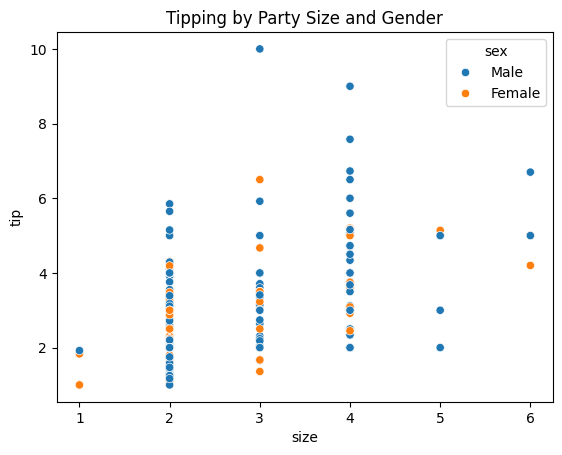

In [ ]:
# Tipping by party size and gender
sns.scatterplot(x='size', y='tip', hue='sex', data=data)
plt.title('Tipping by Party Size and Gender')
plt.show()

## **Task 5**: Is there a relationship between total bill and tip, broken down by day? Highlight day when generous tippers come in and how bills/tips pair.
---
Positive correlation exists, since generous tipping is often seen on weekends.

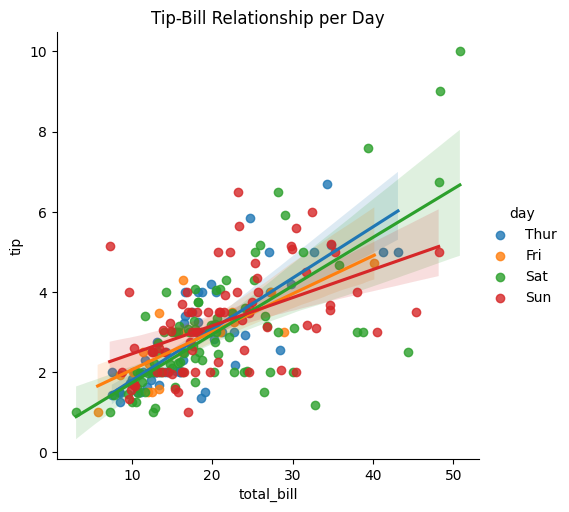

In [ ]:
# Tip-bill relationship per day
sns.lmplot(x='total_bill', y='tip', hue='day', data=data)
plt.title('Tip-Bill Relationship per Day')
plt.show()

## **Task 6**: How does tipping vary between Lunch and Dinner, split by gender? Reveal how tip amounts are concentrated by time and gender.Use violin plot.
---
Dinner tips tend to be higher. Gender splits show distinct patterns.

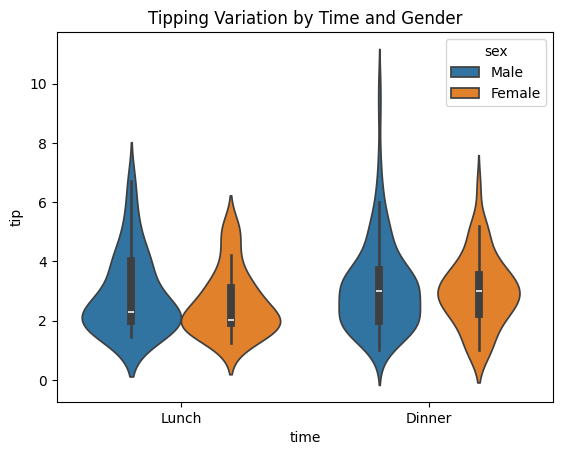

In [ ]:
# Tip by time and gender
sns.violinplot(x='time', y='tip', hue='sex', data=data)
plt.title('Tipping Variation by Time and Gender')
plt.show()

## **Task 7**: Which day sees the most customers?
---
Saturday and Sunday typically attract the most diners.

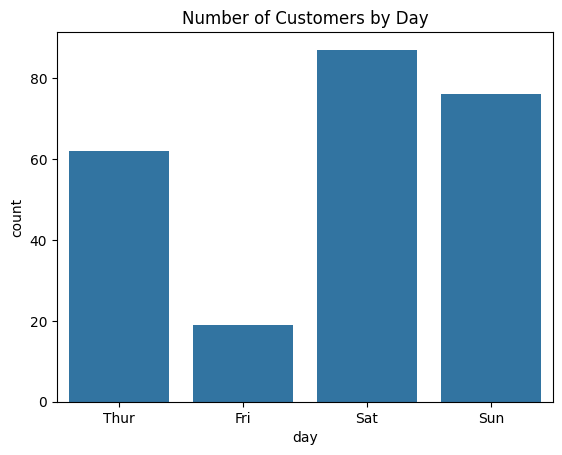

In [ ]:
# Busiest day (most customers)
sns.countplot(x='day', data=data)
plt.title('Number of Customers by Day')
plt.show()

## **Task 8**: What variables are most correlated with tip amount? What does it says, generally?
---
Tip correlates strongest with total bill as expected, but confirms direct economic relationship.

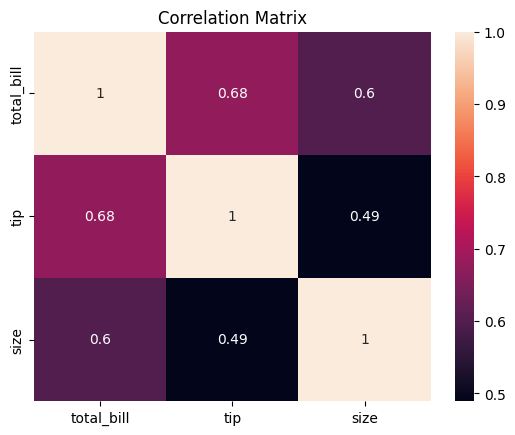

In [ ]:
# Most correlated variables with tip
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

## **Task 9**: Is party size associated with higher bills or tips?
---
Bills scale clearly with party size, while tips vary but trend upwards.

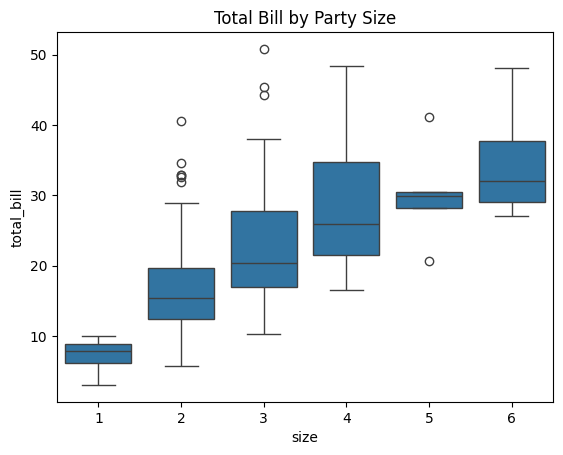

In [ ]:
# Bills by party size
sns.boxplot(x='size', y='total_bill', data=data)
plt.title('Total Bill by Party Size')
plt.show()

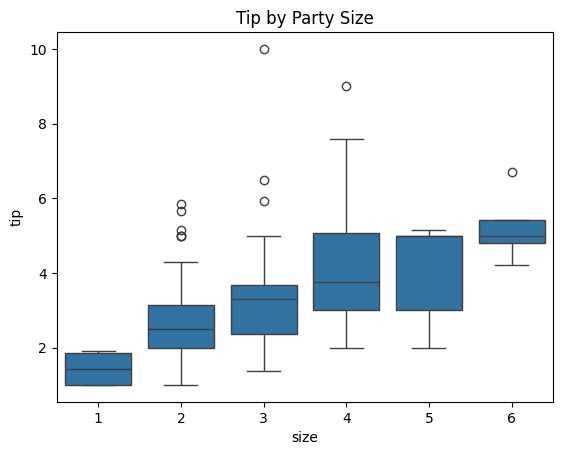

In [ ]:
# Tips by party size
sns.boxplot(x='size', y='tip', data=data)
plt.title('Tip by Party Size')
plt.show()

## **Task 10**: Do total bill and tip always increase together?
---
Strong upward trend exists, though not perfectly linear.

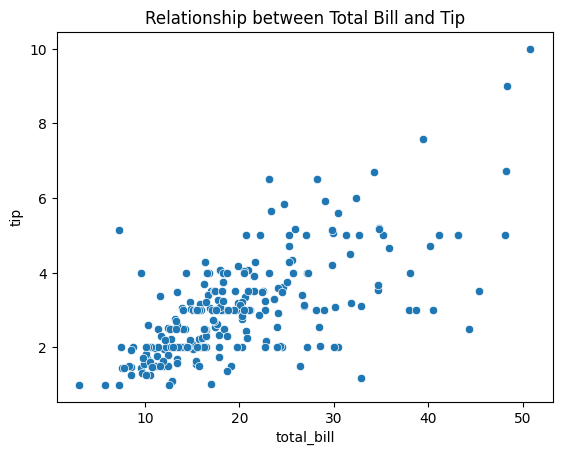

In [ ]:
# Do tips and bills rise together?
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title('Relationship between Total Bill and Tip')
plt.show()

## **Task 11**: How do tip and total_bill relate across days? Spot whether certain days (e.g. Saturday) have bigger bills and tips
---
Saturday shows some of the highest bills and generous tips.

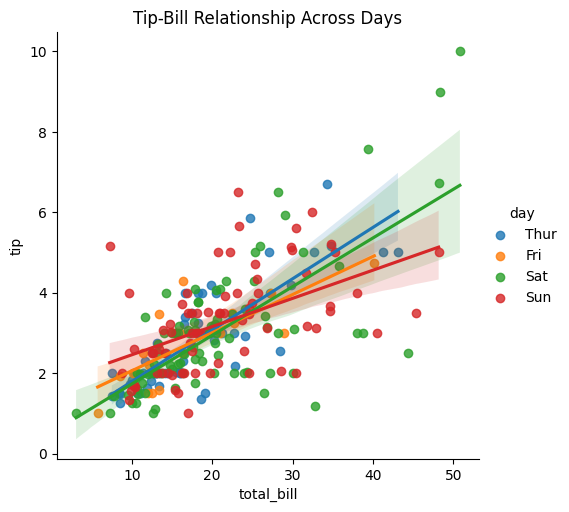

In [ ]:
# Tip-bill relation across days
sns.lmplot(x='total_bill', y='tip', hue='day', data=data)
plt.title('Tip-Bill Relationship Across Days')
plt.show()

## **Task 12**: Are bigger groups more generous tippers? Use hue to reveal gender-based patterns among party size and tipping.
---
Males slightly edge out in higher tips among large groups, but group generosity varies.

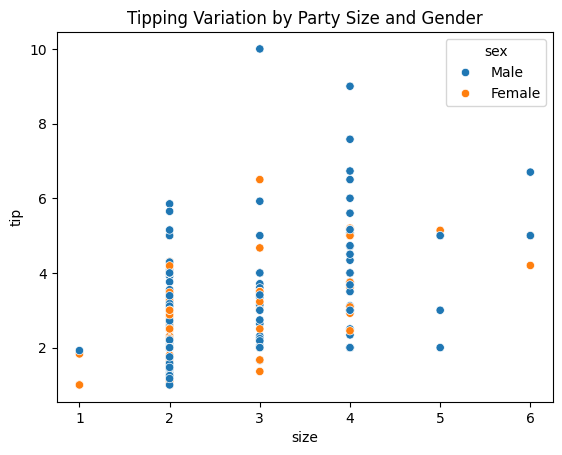

In [ ]:
# Generosity of larger groups + gender
sns.scatterplot(x='size', y='tip', hue='sex', data=data)
plt.title('Tipping Variation by Party Size and Gender')
plt.show()

## **Task 13**: Do males and females show different spending or tipping habits? Highlight behavior differences by color-coded trends.
---
Males may lean toward higher bills and tips, with greate variation than females.

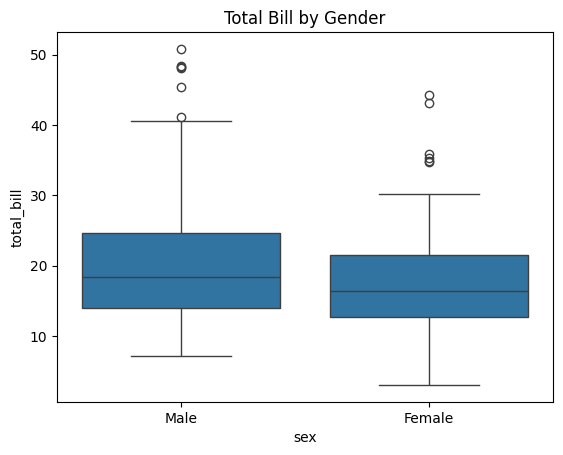

In [ ]:
# Gender-based spending
sns.boxplot(x='sex', y='total_bill', data=data)
plt.title('Total Bill by Gender')
plt.show()

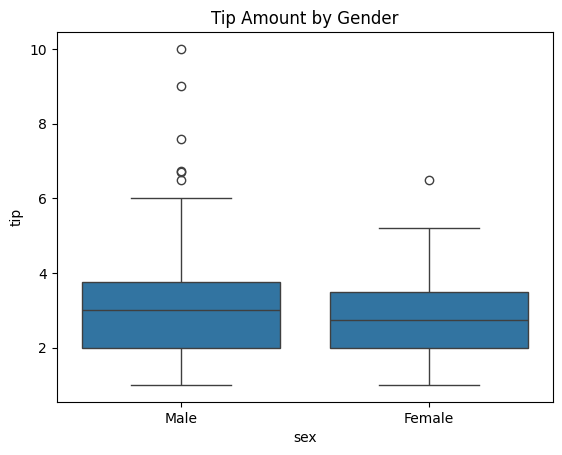

In [ ]:
# Gender-based tipping
sns.boxplot(x='sex', y='tip', data=data)
plt.title('Tip Amount by Gender')
plt.show()